In [4]:
import pandas as pd
rest_df= pd.read_csv('rest_cleaned_data.csv')
rest_df.head()

,name,rating,reviews,lat,lng,address,types,neighbourhood,density,income,district
0,El Nacional Barcelona,4.4,37536.0,41.390583,2.168391,"Pg. de Gràcia, 24 Bis, L'Eixample, 08007 Barce...","spanish_restaurant, restaurant, point_of_inter...",el raval,429,11045.714286,ciutat vella
1,Cerveceria Catalana,4.4,22331.0,41.392325,2.160852,"Carrer de Mallorca, 236, L'Eixample, 08008 Bar...","spanish_restaurant, bar, restaurant, point_of_...",el barri gòtic,268,14032.444444,ciutat vella
2,Vinitus,4.5,15138.0,41.390026,2.164048,"Carrer del Consell de Cent, 333, L'Eixample, 0...","mediterranean_restaurant, bar, restaurant, poi...",la barceloneta,124,14063.454545,ciutat vella
3,Ciutat Comtal,4.4,20566.0,41.388854,2.166771,"Rambla de Catalunya, 18, Eixample, 08007 Barce...","spanish_restaurant, bar, restaurant, point_of_...","sant pere, santa caterina i la ribera",199,15395.615385,ciutat vella
4,La Flauta | Aribau,4.5,11859.0,41.386860,2.161064,"Carrer d'Aribau, 23, L'Eixample, 08011 Barcelo...","mediterranean_restaurant, spanish_restaurant, ...",el fort pienc,336,19193.300000,l'eixample


In [7]:
import folium
from folium.plugins import HeatMap

grouped = rest_df.groupby('neighbourhood').agg({
    'lat': 'mean',
    'lng': 'mean',
    'density': 'mean'
}).reset_index()

# Create base map centered on the mean location
map_center = [grouped['lat'].mean(), grouped['lng'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# Create heat data: list of [lat, lng, density]
heat_data = [[row['lat'], row['lng'], row['density']] for _, row in grouped.iterrows()]

# Add heatmap layer
HeatMap(heat_data, radius=25, blur=15, max_zoom=1).add_to(m)

# Optionally, add tooltips for each neighborhood
for _, row in grouped.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=5,
        tooltip=row['neighbourhood'],
        color='gray',
        fill=True,
        fill_opacity=0.5
    ).add_to(m)

# Save map
m.save("neighbourhood_density_heatmap.html")
print("Heatmap saved as neighbourhood_density_heatmap.html")

Heatmap saved as neighbourhood_density_heatmap.html


In [22]:
grouped = rest_df.groupby('district').agg({
    'income': 'mean',
    'density': 'mean',
    'rating': 'mean',
    'name': 'count'
}).rename(columns={'name': 'restaurant_count'}).reset_index()

grouped

,district,income,density,rating,restaurant_count
0,ciutat vella,13634.307165,255.000000,4.425000,4
1,gràcia,19552.520617,319.333333,3.933333,6
2,horta-guinardo,16454.922881,164.000000,4.250000,10
3,l'eixample,20651.931431,380.166667,4.500000,6
4,les corts,25042.339683,162.666667,4.466667,3
5,nou barris,12536.548482,266.230769,4.230769,13
6,sant andreu,10686.850000,121.500000,4.400000,2
7,sants-montjuic,15716.780114,255.000000,4.442857,7
8,sarrià-sant gervasi,28539.385766,211.666667,4.466667,3


In [26]:
potential_areas = grouped[
    (grouped['income'] > grouped['income'].quantile(0.5)) &  # top 50% income
    (grouped['restaurant_count'] < grouped['restaurant_count'].quantile(0.5))  # below top 25% density
]
potential_areas

,district,income,density,rating,restaurant_count
4,les corts,25042.339683,162.666667,4.466667,3
8,sarrià-sant gervasi,28539.385766,211.666667,4.466667,3


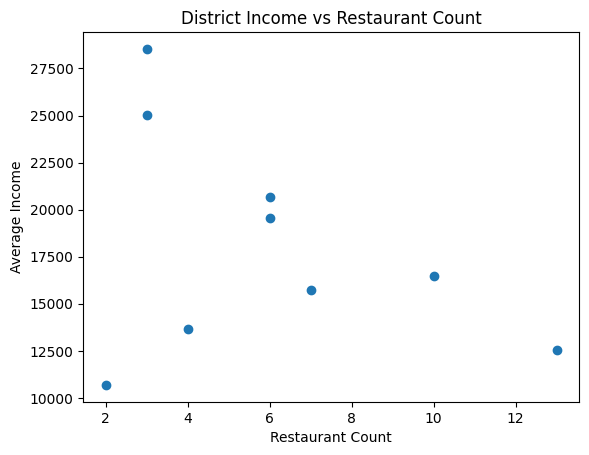

In [27]:
import matplotlib.pyplot as plt

plt.scatter(grouped['restaurant_count'], grouped['income'])
plt.xlabel('Restaurant Count')
plt.ylabel('Average Income')
plt.title('District Income vs Restaurant Count')
plt.show()